<a href="https://colab.research.google.com/github/xanasa14/Finances/blob/main/DownloadingDataYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 5.5MB 5.8MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=13fb6b5cb355b061f5fdd5fc7ae61d875f84eca4b1a889eeea0b1a57c49b3b42
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp36-none-any.whl size=15192 sha256=05e4cea542ec8327f057b8ade62419d0869f424ca10412db722ba0a1ed5f804b
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [2]:
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials

In [7]:
companies = ['TSLA',"AMZN",'WMT','GOOG',"WEN","TGT",'T','TMUS', 'VZ','CTSH',"ACN"]
finalData=pd.DataFrame()
for company in companies:
  tsla_df = yf.download(company, 
                      start='2019-01-01', 
                      end='2021-02-22', 
                      progress=False)
  tsla_df = tsla_df.drop(columns=['Open', 'High','Low', 'Volume',"Adj Close"])
  tsla_df = tsla_df.rename(columns={'Close': company})
  tmp = tsla_df[str(company)]

  finalData = finalData.append(tmp, ignore_index=True)
finalData
finalData = finalData.T # or df2.transpose()
for i in range(len(companies)):
  finalData = finalData.rename(columns={i: companies[i]})




finalData['Date'] = finalData.index
col_name="Date"
first_col = finalData.pop(col_name)
finalData.insert(0, col_name, first_col)
finalData.to_csv('/content/drive/MyDrive/YahooData/YahooFinanceData.csv', index = False, header=True)
finalData

,Date,TSLA,AMZN,WMT,GOOG,WEN,TGT,T,TMUS,VZ,CTSH,ACN
2019-01-02,2019-01-02,62.023998,1539.130005,93.339996,1045.849976,15.640000,66.440002,29.540001,65.260002,56.020000,63.090000,140.589996
2019-01-03,2019-01-03,60.071999,1500.280029,92.860001,1016.059998,15.560000,65.529999,29.580000,65.019997,56.220001,61.099998,135.789993
2019-01-04,2019-01-04,63.537998,1575.390015,93.440002,1070.709961,15.910000,66.430000,30.340000,67.489998,56.360001,63.700001,141.070007
2019-01-07,2019-01-07,66.991997,1629.510010,94.540001,1068.390015,16.160000,69.680000,30.889999,68.440002,56.720001,63.599998,141.559998
2019-01-08,2019-01-08,67.070000,1656.579956,95.199997,1076.280029,16.309999,69.610001,31.280001,67.769997,58.380001,64.320000,145.139999
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-12,2021-02-12,816.119995,3277.709961,144.470001,2104.110107,21.040001,191.429993,28.799999,123.680000,54.200001,76.959999,257.470001
2021-02-16,2021-02-16,796.219971,3268.949951,145.660004,2121.899902,20.700001,190.589996,28.969999,122.000000,54.150002,76.110001,257.049988
2021-02-17,2021-02-17,798.150024,3308.639893,147.199997,2128.310059,20.440001,193.600006,29.570000,121.300003,56.990002,76.430000,258.779999
2021-02-18,2021-02-18,787.380005,3328.229980,137.660004,2117.199951,20.830000,191.410004,29.230000,123.040001,56.980000,74.820000,257.630005


AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


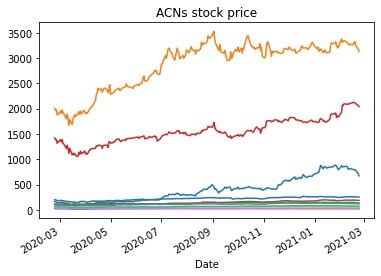

In [8]:
for company in companies:
  ticker = yf.Ticker(company)
  tsla_df = ticker.history(period="1Y")
  print(tsla_df['Close'].plot(title= str(company) + "s stock price"))